In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 50)

In [2]:
KEYS = [
    'entity_id',
    'financial_report_id',
    'financial_statement_id',
    'entity_ico',
    'entity_name']

DIMENSIONS = [
    'year',
    # 'month',
    # 'financial_report_order_number',
    'period_length',
    # 'consolidated',
    # 'approved_date',
    'type',
    'financial_report_template_id',
    # 'establishment_date',
    # 'cancellation_date',
    # 'sknace_code',
    # 'entity_state',
    'legal_form_code',
    'org_size_code',
    'ownership_category_code',
    'entity_consolidated',
    # 'sknace_division_name',
    'sknace_division',
    # 'sknace_subcategory',
    'sal_class',
    'is_mahalanobis_outlier',
    'is_z_score_outlier',
    'is_isolation_forest_outlier']


RATIOS = ['L1',
       'L2', 'L3', 'NCL_CF', 'CASH_TA', 'INV_COGS', 'CC_SAL', 'TL_COST',
       'CL_COST', 'SAL_TA', 'EQ_TA', 'EQ_TL', 'CL_CC', 'LTC_NCA', 'TZ',
       'CF_TL', 'CL_TA', 'NCL_TA', 'EBT_REV', 'ROS', 'EAT_REV', 'ROA', 'ROE',
       'CF_TA', 'CF_SAL', 'LABOR_EAT', 'LABOR_REV']

PRIMARY_VALUES = [
    'CA', 'CASH',
       'CL', 'EQ', 'NCL', 'TA', 'TL', 'CC', 'INV', 'CF_NETTO', 'CF_SELFFIN',
       'REV', 'VA', 'OE', 'EAT', 'EBIT', 'SAL', 'COST', 'INT'
]



In [3]:
training_raw = pd.read_csv('../../DATA/FINAL/training_sample.csv')
testing_raw = pd.read_csv('../../DATA/FINAL/testing_sample.csv')
training_raw

,entity_id,year,month,financial_report_id,financial_report_template_id,CA,CASH,CL,EQ,NCL,TA,TL,CC,INV,CF_NETTO,CF_SELFFIN,REV,VA,OE,EAT,EBIT,SAL,COST,INT,LABOR,L1,L2,L3,NCL_CF,CASH_TA,INV_COGS,CC_SAL,TL_COST,CL_COST,SAL_TA,EQ_TA,EQ_TL,CL_CC,LTC_NCA,TZ,CF_TL,CL_TA,NCL_TA,EBT_REV,ROS,EAT_REV,ROA,ROE,CF_TA,CF_SAL,LABOR_EAT,LABOR_REV,financial_statement_id,financial_report_order_number,entity_ico,period_length,consolidated,approved_date,type,entity_name,establishment_date,cancellation_date,sknace_code,entity_state,legal_form_code,org_size_code,ownership_category_code,entity_consolidated,sknace_division_name,sknace_division,sknace_subcategory,DPHZ_vat_registration_cancelled,DPHZ_vat_registration_cancelled_1y_off,DPHZ_vat_registration_cancelled_2y_off,DPHZ_vat_registration_cancelled_3y_off,RU_event,RU_event_1y_off,RU_event_2y_off,RU_event_3y_off,cancellation_year,RUZ_cancelled,RUZ_cancelled_1y_off,RUZ_cancelled_2y_off,RUZ_cancelled_3y_off,sal_class,establishment_year,is_mahalanobis_outlier,is_z_score_outlier,is_isolation_forest_outlier,RUZ_indirect_criteria,RUZ_indirect_criteria_1y_off,RUZ_indirect_criteria_2y_off,RUZ_indirect_criteria_3y_off,combined_issue_criteria_1y_off,combined_issue_criteria_2y_off,combined_issue_criteria_3y_off,plausible_sample
0,27971.0,2018.0,1.0,6791492,699.0,824851.0,137120.0,564418.0,17376.0,46374.0,875393.0,846466.0,673298.0,11072.0,13087.0,9028.0,3031970.0,260410.0,24567.0,2651.0,6710.0,3031963.0,3007396.0,8218.0,370870.0,0.242941,1.435847,1.455464,3.543516,0.156638,NaN,0.222067,0.281461,0.187677,3.463545,0.019849,0.020115,0.838289,5.924261,1.908459,0.015461,0.644760,0.052975,0.002213,0.000874,0.000874,0.003028,0.152567,0.014950,0.004316,139.898152,0.122320,4101516.0,1.0,652423.0,12.0,NaN,2019-06-28,Riadna,KUHO - mix. spol. s r.o.,1991-06-25,NaN,49410.0,NaN,112.0,2.0,2.0,False,Pozemná doprava a doprava potrubím,H,49.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,NaN,0,0,0,0,2. Malý,1991,False,True,False,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,60314.0,2016.0,1.0,5545966,699.0,58815.0,15639.0,56837.0,127982.0,76345.0,2248496.0,1745181.0,23576.0,18552.0,2741491.0,2731211.0,3322652.0,199899.0,-472509.0,2073411.0,2079171.0,692195.0,1164704.0,1958.0,224570.0,0.275155,0.689955,1.016363,0.027848,0.006955,2.734670,0.034060,1.498390,0.048800,0.307848,0.056919,0.068324,2.410799,0.829493,0.615510,1.570892,0.025278,0.033954,0.625756,2.995415,0.624023,0.922132,16.200802,1.219255,3.960576,0.108309,0.067588,3090140.0,1.0,36589993.0,12.0,NaN,NaN,Riadna,Pivovar Kaltenecker s.r.o.,2005-02-22,2021-06-24,11050.0,NaN,112.0,0.0,8.0,False,Výroba nápojov,C,11.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2021.0,0,0,0,0,2. Malý,2005,True,True,True,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
2,71752.0,2015.0,1.0,5058691,699.0,912862.0,2213.0,48840.0,2399.0,18406.0,948368.0,945969.0,910649.0,0.0,-35846.0,-38726.0,2179262.0,-27686.0,-68089.0,-57122.0,-54242.0,2134583.0,2202672.0,67110.0,12114.0,0.045311,18.690868,18.690868,-0.513474,0.002333,0.000000,0.426617,0.429464,0.022173,2.250796,0.002530,0.002530,0.053632,25.334535,-0.923590,-0.037893,0.051499,0.019408,-0.024890,-0.026760,-0.026212,-0.060232,-23.810754,-0.037798,-0.016793,-0.212072,0.005559,2703097.0,1.0,36584649.0,12.0,NaN,2016-03-10,Riadna,FeCom s.r.o.,2004-10-08,NaN,46720.0,NaN,112.0,0.0,8.0,False,"Veľkoobchod, okrem motorových vozidiel a motoc...",G,46.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,NaN,0,0,0,0,2. Malý,2004,False,True,False,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
3,74296.0,2016.0,1.0,5844975,699.0,514344.0,10817.0,477398.0,-100409.0,0.0,1660755.0,1761164.0,410644.0,92883.0,66009.0,-141558.0,4362628.0,608076.0,-305083.0,-344270.0,-341390.0,4362628.0,4667711.0,34421.0,501993.0,0.022658,0.882829,1.077390,0.000000,0.006513,19.444119,0.094128,0.377308,0.102277,2.626894,-0.060460,-0.060460,1.162559,1.032228,18.888636,0.037480,0.287458,0.000000,-0.078253,-0.078913,-0.078913,-0.207297,3.428677,0.039746,0.015131,-1.458138,0.115067,3338450.0,2.0,36561380.0,12.0,NaN,2017-07-28,Riadna,Hoeckle s.r.o.,2004-06-25,NaN,25620.0,NaN,112

In [4]:
SAL_CLASSES = training_raw['sal_class'].unique()
SKNACE_GROUPS = training_raw['sknace_division'].unique()

In [5]:
training_cleaned = training_raw.query('is_mahalanobis_outlier == False and is_z_score_outlier == False and is_isolation_forest_outlier == False and financial_report_template_id == 699 and sknace_division != "other"')
testing_cleaned = testing_raw.query('is_mahalanobis_outlier == False and is_z_score_outlier == False and is_isolation_forest_outlier == False and financial_report_template_id == 699 and sknace_division != "other"')

In [6]:
mean_values = dict()

for sal_class in SAL_CLASSES:
    for sknace in SKNACE_GROUPS:
        subset_training = training_cleaned.query('sal_class == @sal_class and sknace_division == @sknace')
        segment_mean_values = dict()
        for col in RATIOS:
            mean_value = subset_training[col].mean()
            # if np.isnan(mean_value): print(sal_class, sknace, col)
            segment_mean_values[col] = mean_value
        
        mean_values[(sal_class, sknace)] = segment_mean_values
    


In [7]:
training_filled = pd.DataFrame()
testing_filled = pd.DataFrame()


for sal_class in SAL_CLASSES:
    for sknace in SKNACE_GROUPS:
        subset_training = training_cleaned.query('sal_class == @sal_class and sknace_division == @sknace')
        subset_testing = testing_cleaned.query('sal_class == @sal_class and sknace_division == @sknace')
        segment_mean_values = mean_values[(sal_class, sknace)]
        for col in RATIOS:
            mean_value = segment_mean_values[col]
            subset_training[col] = subset_training[col].fillna(mean_value)
            subset_testing[col] = subset_testing[col].fillna(mean_value)

        training_filled = pd.concat([training_filled, subset_training], axis = 0)
        testing_filled = pd.concat([testing_filled, subset_testing], axis = 0)

C:\Users\matus.rohal\AppData\Local\Temp\ipykernel_8536\4138243076.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_training[col] = subset_training[col].fillna(mean_value)
C:\Users\matus.rohal\AppData\Local\Temp\ipykernel_8536\4138243076.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_testing[col] = subset_testing[col].fillna(mean_value)


In [8]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline


Q = training_filled.query('combined_issue_criteria_3y_off == 1')['entity_id'].nunique()
Q *= 1

control_group_ratio = 1

training_balanced = (
    pd.concat(
        [
            training_filled.query('combined_issue_criteria_3y_off == 0').sample(int(Q * control_group_ratio)),
            training_filled.query('combined_issue_criteria_3y_off == 1').sample(Q, replace = True),
        ], axis = 0
    )
)


Q_test = testing_filled.query('combined_issue_criteria_3y_off == 1')['entity_id'].nunique()
Q_test *= 1

testing_balanced = (
    pd.concat(
        [
            testing_filled.query('combined_issue_criteria_3y_off == 0').sample(int(Q_test * control_group_ratio)),
            testing_filled.query('combined_issue_criteria_3y_off == 1').sample(Q_test, replace = True),
        ], axis = 0
    )
)


X_train_balanced = training_balanced[RATIOS].values
y_train_balanced = training_balanced['combined_issue_criteria_3y_off'].values

X_test_balanced = testing_balanced[RATIOS].values
y_test_balanced = testing_balanced['combined_issue_criteria_3y_off'].values

X_train_imbalanced = training_filled[RATIOS].values
y_train_imbalanced = training_filled['combined_issue_criteria_3y_off'].values

X_test_imbalanced = testing_filled[RATIOS].values
y_test_imbalanced = testing_filled['combined_issue_criteria_3y_off'].values


# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state=42, )

# X_train_balanced, y_train_balanced = smote.fit_resample(X_train_imbalanced, y_train_imbalanced)
# X_test_balanced, y_test_balanced = smote.fit_resample(X_test_imbalanced, y_test_imbalanced)



In [9]:
print(X_train_balanced.shape, X_test_balanced.shape)
print(X_train_imbalanced.shape, X_test_imbalanced.shape)

(1144, 27) (246, 27)
(5163, 27) (1276, 27)


In [10]:
print(pd.Series(y_test_balanced).value_counts())
print(pd.Series(y_test_imbalanced).value_counts())
print(pd.Series(y_test_imbalanced).value_counts(normalize=True))

print(pd.Series(y_train_balanced).value_counts())
print(pd.Series(y_train_imbalanced).value_counts())
print(pd.Series(y_train_imbalanced).value_counts(normalize=True))

0.0    123
1.0    123
dtype: int64
0.0    1153
1.0     123
dtype: int64
0.0    0.903605
1.0    0.096395
dtype: float64
0.0    572
1.0    572
dtype: int64
0.0    4591
1.0     572
dtype: int64
0.0    0.889212
1.0    0.110788
dtype: float64


In [11]:

from sklearn.feature_selection import RFECV
from sklearn.metrics import fbeta_score, make_scorer, f1_score

# Create a custom scorer for use in GridSearchCV or RFECV
f2_scorer = make_scorer(fbeta_score, beta=2)

# Define a custom scoring function
def custom_score(y_true, y_pred):
    recall = recall_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    # Weight recall more heavily
    return 0.8 * recall + 0.2 * accuracy

custom_scorer = make_scorer(custom_score, greater_is_better=True)

In [12]:
def eval(real, pred, label):
    recall = recall_score(real, pred)
    accuracy = accuracy_score(real, pred)
    print(f"{label} Accuracy:", accuracy)
    print(f"{label} Precision:", precision_score(real, pred))
    print(f"{label} Recall:", recall)
    print(f"{label} Balanced Accuracy:", balanced_accuracy_score(real, pred))
    print(f"{label} F1 Score:", f1_score(real, pred))
    print(f"{label} F2 Score:", fbeta_score(real, pred, beta=2))
    print(f"{label} Custom Scorer:", 0.8 * recall + 0.2 * accuracy)

    cm = confusion_matrix(real, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(label)
    plt.show()

## Decision Tree Classifier

c:\Users\matus.rohal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\matus.rohal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\matus.rohal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\matus.rohal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` ha

Selected Features: [False  True  True  True  True  True False False False False  True  True
  True  True  True False  True False  True False  True  True  True False
 False  True  True]
Feature Ranking: [3 1 1 1 1 1 3 3 2 2 1 1 1 1 1 2 1 2 1 2 1 1 1 3 3 1 1]
Balanced train Accuracy: 0.8094405594405595
Balanced train Precision: 0.828996282527881
Balanced train Recall: 0.7797202797202797
Balanced train Balanced Accuracy: 0.8094405594405594
Balanced train F1 Score: 0.8036036036036036
Balanced train F2 Score: 0.7891012031139419
Balanced train Custom Scorer: 0.7856643356643357


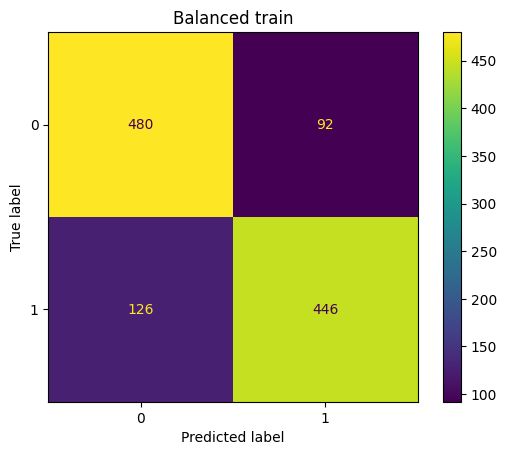

Balanced test Accuracy: 0.5813008130081301
Balanced test Precision: 0.5925925925925926
Balanced test Recall: 0.5203252032520326
Balanced test Balanced Accuracy: 0.5813008130081301
Balanced test F1 Score: 0.5541125541125541
Balanced test F2 Score: 0.5333333333333333
Balanced test Custom Scorer: 0.5325203252032521


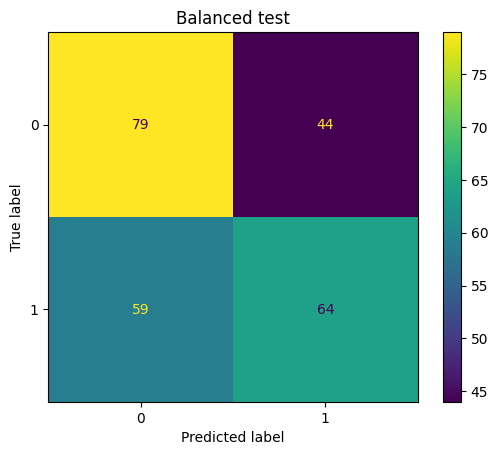

Imbalanced test Accuracy: 0.7147335423197492
Imbalanced test Precision: 0.18701298701298702
Imbalanced test Recall: 0.5853658536585366
Imbalanced test Balanced Accuracy: 0.6569500560573689
Imbalanced test F1 Score: 0.2834645669291339
Imbalanced test F2 Score: 0.410490307867731
Imbalanced test Custom Scorer: 0.6112393913907791


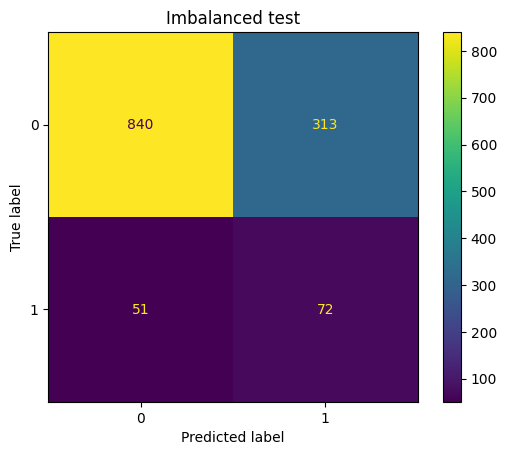

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFECV
from sklearn.metrics import make_scorer, fbeta_score

# Assume custom_scorer is already defined
def custom_score(y_true, y_pred):
    # Define your custom scoring function here
    recall = recall_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    return 0.7 * recall + 0.3 * accuracy

custom_scorer = make_scorer(custom_score, greater_is_better=True)

# Define your data (X_train_balanced, y_train_balanced, X_test_imbalanced, X_test_balanced)
# Ensure you have these data variables already prepared as the code assumes they exist.

# Create a Decision Tree classifier
dt = DecisionTreeClassifier(
    criterion = 'gini',
    max_depth = 15,
    max_features = 'auto',
    min_impurity_decrease = 0.0,
    min_samples_leaf = 5,
    min_samples_split = 10
)

# Create RFECV object with Decision Tree as the estimator
dt_rfe = RFECV(estimator=dt, step=5, cv=5, scoring='accuracy', n_jobs=4)

# Fit RFECV
dt_rfe.fit(X_train_balanced, y_train_balanced)

# Transform the data
X_train_selected = dt_rfe.transform(X_train_balanced)
X_test_selected = dt_rfe.transform(X_test_imbalanced)
X_test_selected_balanced = dt_rfe.transform(X_test_balanced)

# Train a new classifier using only selected features
dt_final = DecisionTreeClassifier(
    criterion = 'gini',
    max_depth = 8,
    max_features = 'auto',
    min_impurity_decrease = 0.0001,
    min_samples_leaf = 5,
    min_samples_split = 30
    )

dt_final.fit(X_train_selected, y_train_balanced)

# Predict and calculate accuracy
y_pred = dt_final.predict(X_test_selected)
y_pred_balanced = dt_final.predict(X_test_selected_balanced)
y_pred_train = dt_final.predict(X_train_selected)

print("Selected Features:", dt_rfe.support_)
print("Feature Ranking:", dt_rfe.ranking_)


eval(y_train_balanced, y_pred_train, 'Balanced train')
eval(y_test_balanced, y_pred_balanced, 'Balanced test')
eval(y_test_imbalanced, y_pred, 'Imbalanced test')


In [14]:
X_train_selected = dt_rfe.transform(X_train_balanced)

In [15]:
from sklearn.model_selection import GridSearchCV
# first testing


param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [10, 20, 50, 100],
    'min_samples_leaf': [5, 10, 20, 50],
    'min_impurity_decrease': [0.1, 0.001, 0.0001, 0.0],
    'max_features': ['auto', 'sqrt', 'log2']
}

# param_grid = {
#     'n_estimators': [50, 100, 120],
#     'max_depth': [None, 15, 20],
#     'min_samples_split': [2, 10, 15],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2']
# }

# param_grid = {
#     'criterion': ['gini'],
#     'max_depth': [None],
#     'max_features': ['auto'],
#     'min_impurity_decrease': [0.001, 0.0001],
#     'min_samples_leaf': [5, 10, 20],
#     'min_samples_split': [10, 20, 30, 50]}




rf = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=4, verbose=10, scoring=f2_scorer)
grid_search.fit(X_train_selected, y_train_balanced)

Fitting 5 folds for each of 1536 candidates, totalling 7680 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_impurity_decrease': [0.1, 0.001, 0.0001, 0.0],
                         'min_samples_leaf': [5, 10, 20, 50],
                         'min_samples_split': [10, 20, 50, 100]},
             scoring=make_scorer(fbeta_score, beta=2), verbose=10)

In [16]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 5,
 'min_samples_split': 10}

In [17]:
# Extract grid search results
cv_results = pd.DataFrame(grid_search.cv_results_)

# Display grid search results
# print(cv_results[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']])

# Sort by rank to see the best combinations first
sorted_cv_results = cv_results.sort_values(by='rank_test_score')
sorted_cv_results.head(20)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_impurity_decrease,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
880,0.009564,0.007425,0.000000,0.000000,entropy,None,sqrt,0.0,5,10,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.783133,0.669014,0.773810,0.722892,0.704100,0.730590,0.042851,1
499,0.003118,0.006236,0.003124,0.006248,gini,10,sqrt,0.0,5,100,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.704467,0.738255,0.746644,0.698276,0.764007,0.730330,0.025137,2
97,0.010224,0.007486,0.001760,0.001438,gini,None,sqrt,0.0001,5,20,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.719237,0.759931,0.745763,0.706897,0.713028,0.728971,0.020380,3
912,0.008628,0.002073,0.001597,0.000806,entropy,None,log2,0.001,5,10,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.787671,0.714286,0.767285,0.664940,0.705575,0.727951,0.044208,4
1527,0.004929,0.000177,0.001087,0.000176,entropy,15,log2,0.0,10,100,"{'criterion': 'entropy', 'max_depth': 15, 'max...",0.686275,0.791246,0.769868,0.630551,0.753899,0.726368,0.059410,5
795,0.006283,0.001121,0.002502,0.000618,entropy,None,auto,0.001,20,100,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.760331,0.762565,0.731293,0.570652,0.806723,0.726313,0.081477,6
885,0.003125,0.006249,0.003124,0.006248,entropy,None,sqrt,0.0,10,20,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.721831,0.735552,0.741990,0.666667,0.740741,0.721356,0.028264,7
555,0.006205,0.006368,0.000997,0.000630,gini,10,log2,0.0001,20,100,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.750000,0.695187,0.703259,0.686106,0.768581,0.720627,0.032566,8
503,0.003791,0.002097,0.003700,0.003843,gini,10,sqrt,0.0,10,100,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.770548,0.782609,0.725256,0.627208,0.685413,0.718207,0.057084,9
160,0.006248,0.007652,0.000000,0.000000,gini,None,log2,0.0001,5,10,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.756014,0.720486,0.738540,0.618280,0.750436,0.716751,0.050718,10


In [18]:
head = cv_results.sort_values(by='rank_test_score').head(10)

new_params = dict()

for param_name in ['param_criterion', 'param_max_depth', 'param_max_features', 'param_min_impurity_decrease', 'param_min_samples_leaf', 'param_min_samples_split']:
    new_params[param_name] = list(head[param_name].unique())

display(new_params)      


{'param_criterion': ['entropy', 'gini'],
 'param_max_depth': [None, 10, 15],
 'param_max_features': ['sqrt', 'log2', 'auto'],
 'param_min_impurity_decrease': [0.0, 0.0001, 0.001],
 'param_min_samples_leaf': [5, 10, 20],
 'param_min_samples_split': [10, 100, 20]}

Imbalanced test Accuracy: 0.7170846394984326
Imbalanced test Precision: 0.18848167539267016
Imbalanced test Recall: 0.5853658536585366
Imbalanced test Balanced Accuracy: 0.6582510100903264
Imbalanced test F1 Score: 0.2851485148514852
Imbalanced test F2 Score: 0.4118993135011441
Imbalanced test Custom Scorer: 0.6117096108265158


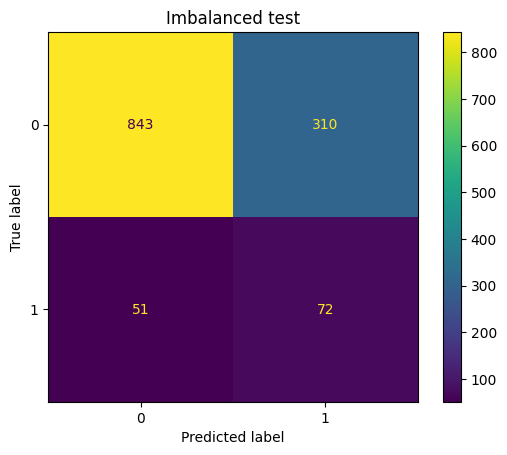

In [19]:
eval(y_test_imbalanced, grid_search.best_estimator_.predict(X_test_selected), 'Imbalanced test')